In [1]:
import cv2
import numpy as np
from PIL import Image
import os
import random
import matplotlib.pyplot as plt
import tarfile
import seaborn as sns

In [2]:
GEN_DATA = False

### Image resizing and converting to grey scale

Below we resize each image to 256 X 256 and convert to grey scale for consistency, which becomes convenient when we use the CNNslater on. There is no need to run the below cell if we are using the data from getData.sh (see README)

In [3]:
if not GEN_DATA:
    print("GEN_DATA disabled")

else:

    images_train = []
    images_test = []


    for filename in os.listdir('data/training_set/cats'):
        if filename.endswith('.jpg'):
            image = cv2.imread(os.path.join('data/training_set/cats', filename))
            image = cv2.resize(image, (256, 256))
            image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
            images_train.append(image)

    for filename in os.listdir('data/training_set/dogs'):
        if filename.endswith('.jpg'):
            image = cv2.imread(os.path.join('data/training_set/dogs', filename))
            image = cv2.resize(image, (256, 256))
            image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
            images_train.append(image)

    for filename in os.listdir('data/test_set/cats'):
        if filename.endswith('.jpg'):
            image = cv2.imread(os.path.join('data/test_set/cats', filename))
            image = cv2.resize(image, (256, 256))
            image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
            images_test.append(image)

    for filename in os.listdir('data/test_set/dogs'):
        if filename.endswith('.jpg'):
            image = cv2.imread(os.path.join('data/test_set/dogs', filename))
            image = cv2.resize(image, (256, 256))
            image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
            images_test.append(image)

    random.shuffle(images_train)
    random.shuffle(images_test)

    for i in range(len(images_train)):
        cv2.imwrite(f'data/training_set_resized/training_image_resized_{i+1}.jpg', images_train[i])

    for i in range(len(images_test)):
        cv2.imwrite(f'data/test_set_resized/test_image_resized_{i+1}.jpg', images_test[i])
    



GEN_DATA disabled


### Image Degradation Functions

Below are functions that degrade image quality via blurring, adding noise, or compression

In [20]:
def add_noise(image, noise_level=0.1, indx=0, set_type="test"):
    
    level = int((noise_level * 20) + 1) 

    noisy_image = image.copy()

    num_pixels = image.shape[0] * image.shape[1]
    num_noise_pixels = int(num_pixels * noise_level)
    
    for _ in range(num_noise_pixels):
        y = np.random.randint(0, image.shape[0])
        x = np.random.randint(0, image.shape[1])

        noise_color = np.random.randint(0, np.max(image))
        
        noisy_image[y, x] = noise_color
    
    cv2.imwrite(f'data/{set_type}_noise_{level}/{set_type}_image_noise_{indx+1}.jpg', noisy_image)
    
    return noisy_image

def add_gaussian_blur(image, kernel_size=(5, 5), indx=0, set_type="test"):
    
    level = round((kernel_size[0] - 1) / 4)
    
    blurred_image = cv2.GaussianBlur(image, kernel_size, 0)
    
    cv2.imwrite(f'data/{set_type}_blurred_{level}/{set_type}_image_blurred_{indx+1}.jpg', blurred_image)
    
    return cv2.GaussianBlur(image, kernel_size, 0)

def compress_image(image, quality=10, indx=0, set_type="test"):
    
    level = int(6 + (quality / -5))
    
    pil_image = Image.fromarray(image)
    compressed_image_path = f'data/{set_type}_compressed_{level}/{set_type}_image_compressed_{indx+1}.jpg'
    #compressed_image_path = f'data/test.jpg'
    pil_image.save(compressed_image_path, 'JPEG', quality=quality)
    compressed_image = cv2.imread(compressed_image_path)

    return compressed_image
 

### Generating Degraded Images

The below cell takes each of the non-degraded images and applies five levels of degradation for each of the three degradation types. There is no need to re-run this cell unless using images other than what is already given by genData.sh (see README)

In [67]:
if not GEN_DATA:
    print("GEN_DATA disabled")

else:
    print('Generating degraded images...')
    
    sorted_training = sorted([file for file in os.listdir('data/training_set_resized') if file.endswith('.jpg')], 
                         key = lambda x: int(x.split('_')[-1].split('.')[0]))
    sorted_test = sorted([file for file in os.listdir('data/test_set_resized') if file.endswith('.jpg')], 
                             key = lambda x: int(x.split('_')[-1].split('.')[0]))

    images_training_resized = [cv2.imread(os.path.join('data/training_set_resized', filename)) 
                               for filename in sorted_training]
    images_test_resized = [cv2.imread(os.path.join('data/test_set_resized', filename))
                               for filename in sorted_test]
    
    for indx, image in enumerate(images_training_resized):
        
        image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

        add_gaussian_blur(image, (5, 5), indx, "training")
        add_gaussian_blur(image, (9, 9), indx, "training")
        add_gaussian_blur(image, (13, 13), indx, "training")
        add_gaussian_blur(image, (17, 17), indx, "training")
        add_gaussian_blur(image, (21, 21), indx, "training")

        add_noise(image, 0.01, indx, "training")
        add_noise(image, 0.05, indx, "training")
        add_noise(image, 0.10, indx, "training")
        add_noise(image, 0.15, indx, "training")
        add_noise(image, 0.20, indx, "training")

        compress_image(image, 25, indx, "training")
        compress_image(image, 20, indx, "training")
        compress_image(image, 15, indx, "training")
        compress_image(image, 10, indx, "training")
        compress_image(image, 5, indx, "training")

    for indx, image in enumerate(images_test_resized):
        
        image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

        add_gaussian_blur(image, (5, 5), indx, "test")
        add_gaussian_blur(image, (9, 9), indx, "test")
        add_gaussian_blur(image, (13, 13), indx, "test")
        add_gaussian_blur(image, (17, 17), indx, "test")
        add_gaussian_blur(image, (21, 21), indx, "test")

        add_noise(image, 0.01, indx, "test")
        add_noise(image, 0.05, indx, "test")
        add_noise(image, 0.10, indx, "test")
        add_noise(image, 0.15, indx, "test")
        add_noise(image, 0.20, indx, "test")

        compress_image(image, 25, indx, "test")
        compress_image(image, 20, indx, "test")
        compress_image(image, 15, indx, "test")
        compress_image(image, 10, indx, "test")
        compress_image(image, 5, indx, "test")
        
    print('Done generating degraded images')

Generating degraded images...
Done generating degraded images


### Converting images to .npy files

Here we convert each directory of images into a numpy array and save it as a .npy file. This makes it easier to repeatedly load the images into numpy arrays and is more effecient than constantly reading a bunch of files into an array.

In [68]:
directories = [
    'data/training_set_resized',
    'data/training_blurred_1',
    'data/training_blurred_2',
    'data/training_blurred_3',
    'data/training_blurred_4',
    'data/training_blurred_5',
    'data/training_noise_1',
    'data/training_noise_2',
    'data/training_noise_3',
    'data/training_noise_4',
    'data/training_noise_5',
    'data/training_compressed_1',
    'data/training_compressed_2',
    'data/training_compressed_3',
    'data/training_compressed_4',
    'data/training_compressed_5',
    'data/test_set_resized',
    'data/test_blurred_1',
    'data/test_blurred_2',
    'data/test_blurred_3',
    'data/test_blurred_4',
    'data/test_blurred_5',
    'data/test_noise_1',
    'data/test_noise_2',
    'data/test_noise_3',
    'data/test_noise_4',
    'data/test_noise_5',
    'data/test_compressed_1',
    'data/test_compressed_2',
    'data/test_compressed_3',
    'data/test_compressed_4',
    'data/test_compressed_5'
]

for directory in directories:
    
    image_set_name = directory.replace('data/', '')
    
    if os.path.exists('{}/{}.npy'.format(directory, image_set_name)):
        
        print('{}.npy already exists'.format(image_set_name))
        
    else:
    
        print('Creating {}.npy'.format(image_set_name))

        image_data = []

        for filename in os.listdir(directory):

            if filename.endswith('.jpg'):

                img_path = os.path.join(directory, filename)
                img = Image.open(img_path)

                img_array = np.array(img)

                image_data.append(img_array)


        image_data = np.array(image_data)

        np.save('{}/{}'.format(directory, image_set_name), image_data)

training_set_resized.npy already exists
training_blurred_1.npy already exists
training_blurred_2.npy already exists
training_blurred_3.npy already exists
training_blurred_4.npy already exists
training_blurred_5.npy already exists
training_noise_1.npy already exists
training_noise_2.npy already exists
training_noise_3.npy already exists
training_noise_4.npy already exists
training_noise_5.npy already exists
training_compressed_1.npy already exists
training_compressed_2.npy already exists
training_compressed_3.npy already exists
training_compressed_4.npy already exists
training_compressed_5.npy already exists
test_set_resized.npy already exists
test_blurred_1.npy already exists
test_blurred_2.npy already exists
test_blurred_3.npy already exists
test_blurred_4.npy already exists
test_blurred_5.npy already exists
Creating test_noise_1.npy
Creating test_noise_2.npy
Creating test_noise_3.npy
Creating test_noise_4.npy
Creating test_noise_5.npy
test_compressed_1.npy already exists
test_compres

### Undegradaed image example

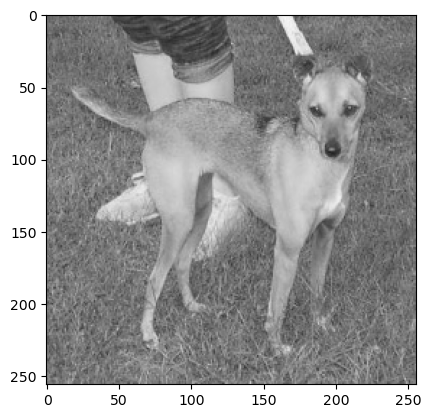

In [57]:
plt.imshow(cv2.imread('data/training_set_resized/training_image_resized_100.jpg'), cmap='gray')

### Five Levels of Blurring Example

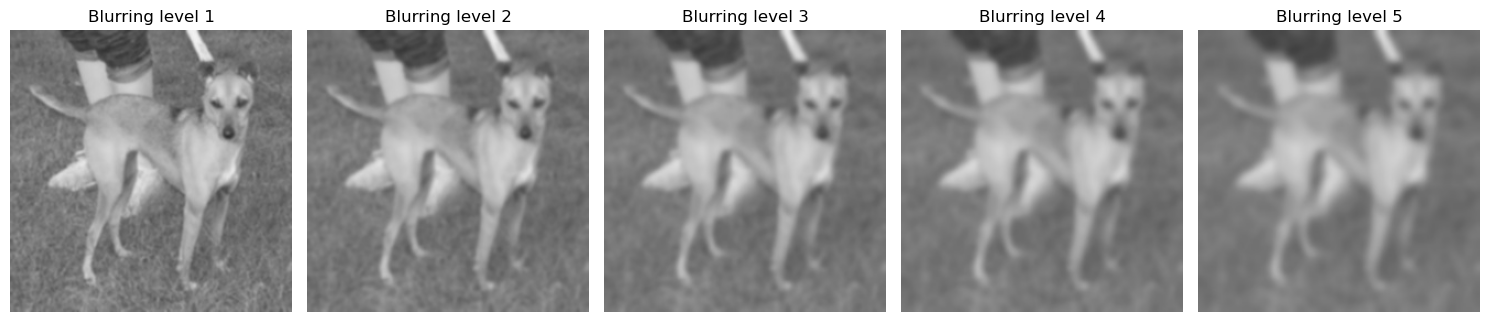

In [58]:
image_paths = ['data/training_blurred_1/training_image_blurred_100.jpg',
               'data/training_blurred_2/training_image_blurred_100.jpg',
               'data/training_blurred_3/training_image_blurred_100.jpg',
               'data/training_blurred_4/training_image_blurred_100.jpg',
               'data/training_blurred_5/training_image_blurred_100.jpg']

fig, axes = plt.subplots(1, len(image_paths), figsize=(15, 5))

for ax, img_path in zip(axes, image_paths):

    image = cv2.imread(img_path)
    
    ax.imshow(image)
    ax.axis('off') 
    ax.set_title(f'Blurring level {img_path.split("_")[2][0]}')  

plt.tight_layout()
plt.show()

### Five Levels of Noise Example

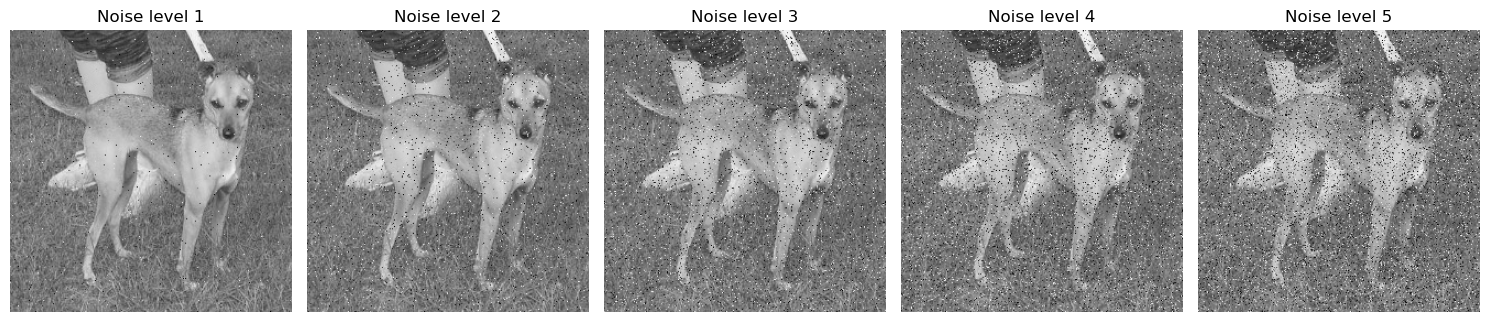

In [59]:
image_paths = ['data/training_noise_1/training_image_noise_100.jpg',
               'data/training_noise_2/training_image_noise_100.jpg',
               'data/training_noise_3/training_image_noise_100.jpg',
               'data/training_noise_4/training_image_noise_100.jpg',
               'data/training_noise_5/training_image_noise_100.jpg']

fig, axes = plt.subplots(1, len(image_paths), figsize=(15, 5)) 

for ax, img_path in zip(axes, image_paths):

    image = cv2.imread(img_path)
    
    ax.imshow(image)
    ax.axis('off')
    ax.set_title(f'Noise level {img_path.split("_")[2][0]}')

plt.tight_layout()
plt.show()

### Five Levels of Compression Example

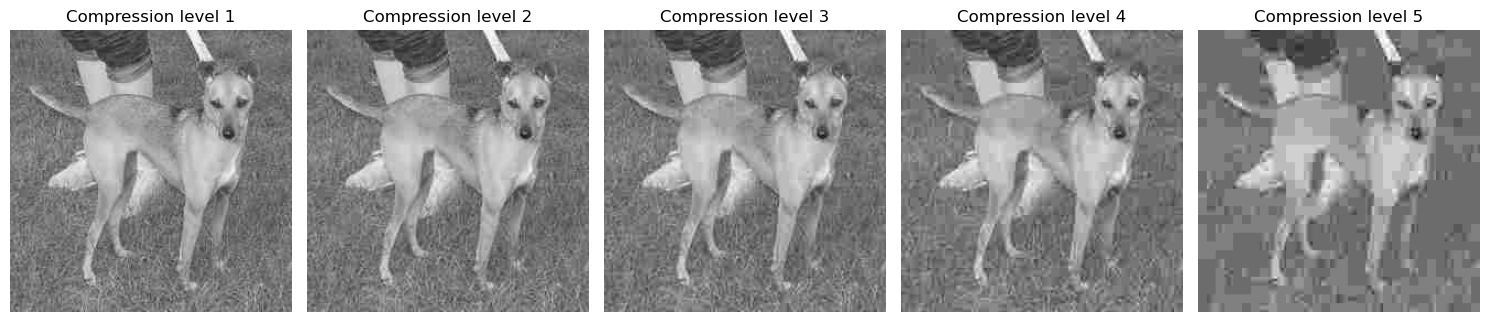

In [60]:
image_paths = ['data/training_compressed_1/training_image_compressed_100.jpg',
               'data/training_compressed_2/training_image_compressed_100.jpg',
               'data/training_compressed_3/training_image_compressed_100.jpg',
               'data/training_compressed_4/training_image_compressed_100.jpg',
               'data/training_compressed_5/training_image_compressed_100.jpg']

images = []

fig, axes = plt.subplots(1, len(image_paths), figsize=(15, 5))

for ax, img_path in zip(axes, image_paths):
    image = cv2.imread(img_path)
    images.append(image)
    
    ax.imshow(image)
    ax.axis('off') 
    ax.set_title(f'Compression level {img_path.split("_")[2][0]}')

plt.tight_layout()
plt.show()

### Data set loader helper function

This function returns a training and test set of a partiular type of image. Types include, undegraded, blurred, noise, and compressed. In addition the degradation levels included in the set is controled by the degradation_levels parameter. This is an efficient way to load in datasets since it is using the .npy files created earlier. 

In [2]:
def get_data(degradation_type, degradation_levels=[], numImages=10000000, numImagesTest=10000000):

    if degradation_levels:
        deg = f'{degradation_type}_{degradation_levels[0]}'
    else:
        deg = f'{degradation_type}'
    
    train_images_np = np.load(f'data/training_{deg}/training_{deg}.npy')[0:numImages]

    test_images_np = np.load(f'data/test_{deg}/test_{deg}.npy')[0:numImagesTest]

    
    
    for i in degradation_levels[1:]:
        deg = f'{degradation_type}_{i}'
        train_images_np = np.concatenate((train_images_np, 
                                          np.load(f'data/training_{deg}/training_{deg}.npy')[0:numImages]), axis=0)

        test_images_np = np.concatenate((test_images_np,
                                          np.load(f'data/test_{deg}/test_{deg}.npy')[0:numImagesTest]), axis=0)
    
    return train_images_np, test_images_np

In [3]:
def gen_labels(set_lengths):
    labels = []
    label = 0
    
    for i, (set_len, levels) in enumerate(set_lengths):
        for level in range(levels):
            if len(labels) == 0:
                labels = np.ones(set_len//levels)*label
            else:
                labels = np.concatenate((labels, np.ones(set_len//levels)*label), axis=0)
            label += 1
        
    return labels
    

### Pytorch imports

In [4]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
from torch.utils.data import TensorDataset, DataLoader

### Defining the CNN and some helper functions

In [11]:
class ConvNet(nn.Module):
    
    def __init__(self, num_classes=2):
        super(ConvNet, self).__init__()
        self.conv1 = nn.Conv2d(1, 6, 5) 
        self.pool = nn.MaxPool2d(6, 6)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 6 * 6, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, num_classes)  

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x.view(-1, 1, 256, 256)))) 
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 6 * 6)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

def np_to_torchLoader(images_np, labels_np, batchSize):
    images_torch = np.array(images_np)
    labels_torch = np.array(labels_np)

    images_tensor = torch.Tensor(images_torch).unsqueeze(1)
    labels_tensor = torch.Tensor(labels_torch).type(torch.LongTensor)

    DataSet = TensorDataset(images_tensor, labels_tensor)
    Loader = DataLoader(DataSet, batch_size=batchSize)
    return Loader

def trainCNN(images_np, labels_np, test_np, test_labels_np, numImages=10000000, 
             num_classes=2, epochs=20):
    
    images_np = images_np[0:numImages]
    labels_np = labels_np[0:numImages]
    
    convNet = ConvNet(num_classes)
    
    percentCorrectPerEpochTrain = []
    percentCorrectPerEpochTest = []

    criterion = nn.CrossEntropyLoss()
    optimizer = optim.SGD(convNet.parameters(), lr=0.001, momentum=0.9)
    loss = 1

    for epoch in range(epochs):
        loader = np_to_torchLoader(images_np, labels_np, 256)
        running_loss = 0.0
        for i, data in enumerate(loader):

            inputs, labels = data
            
            optimizer.zero_grad()
   
            outputs = convNet(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            running_loss += loss.item()
      
            if i % 255 == 0:  
                print(f'Epoch {epoch+1} loss: {running_loss / 256 :.7f}')
                loss = running_loss / 256
 
            running_loss = 0.0
        
        loader = np_to_torchLoader(images_np, labels_np, 1)
        train_accuracy, _, _ = testCNN(convNet, loader, num_classes)
        loader = np_to_torchLoader(test_np, test_labels_np, 1)
        test_accuracy, _, _ = testCNN(convNet, loader, num_classes)
        percentCorrectPerEpochTrain.append(train_accuracy)
        percentCorrectPerEpochTest.append(test_accuracy)
        
    print('Finished Training')

    return convNet, percentCorrectPerEpochTrain, percentCorrectPerEpochTest

def testCNN(convNet, loader, num_classes):
    wrongly_classified = {}
    confusion_mat = np.zeros((num_classes, num_classes))
    numCorrect = 0
    dataiter = iter(loader)
    for image, label in dataiter:
        yhat = convNet(image)
        _, predicted = torch.max(yhat, 1)
        if predicted == label: 
            numCorrect += 1
        elif predicted[0].item() in wrongly_classified:
            wrongly_classified[predicted[0].item()].append((image, label[0].item()))
        else:
            wrongly_classified[predicted[0].item()] = [(image, label[0].item())]
        
        confusion_mat[label, predicted] += 1
            
    return numCorrect/len(dataiter), wrongly_classified, confusion_mat

def plot_accuracy_per_epoch(epochs, train, test, title):
    plt.figure(figsize=(6, 6))
    plt.plot(range(1, epochs+1), train, label = "Train Accuracy Over Epochs")
    plt.plot(range(1, epochs+1), test, label = "Validation Accuracy Over Epochs")
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.title(title)
    plt.legend()
    plt.show()

### Blurring degradation detection test

Here we train the CNN to classifiy an image as degraded or undegraded using the level 1 blurred images as the degraded set. This test is to see if the CNN can tell the difference between the lowest level of blurring and an undegraded image.

In [6]:
normal_train, normal_test = get_data('set_resized')
blurr_train, blurr_test = get_data('blurred', [1])

images_train = np.concatenate((normal_train, blurr_train))
images_train_labels = gen_labels([(len(normal_train), 1), (len(blurr_train), 1)])

images_test = np.concatenate((normal_test, blurr_test))
images_test_labels = gen_labels([(len(normal_test), 1), (len(blurr_test), 1)])

indicies = np.random.permutation(len(images_train))

convNet, percentCorrectPerEpochTrain, percentCorrectPerEpochTest = trainCNN(images_train[indicies], 
                                                                            images_train_labels[indicies], 
                                                                            images_test,
                                                                            images_test_labels, num_classes=2)

Epoch 1 loss: 0.0027242
Epoch 2 loss: 0.0023093
Epoch 3 loss: 0.0020096
Epoch 4 loss: 0.0013923
Epoch 5 loss: 0.0011057
Epoch 6 loss: 0.0009248
Epoch 7 loss: 0.0008260
Epoch 8 loss: 0.0007233
Epoch 9 loss: 0.0008261
Epoch 10 loss: 0.0006918
Epoch 11 loss: 0.0006515
Epoch 12 loss: 0.0005868
Epoch 13 loss: 0.0005437
Epoch 14 loss: 0.0005117
Epoch 15 loss: 0.0008551
Epoch 16 loss: 0.0009098
Epoch 17 loss: 0.0007508
Epoch 18 loss: 0.0006224
Epoch 19 loss: 0.0007380
Epoch 20 loss: 0.0006499
Finished Training


### Testing blurring level 1 detection

Here we can clearly see that the above CNN is capable of dedecting the lowest level of blurring.

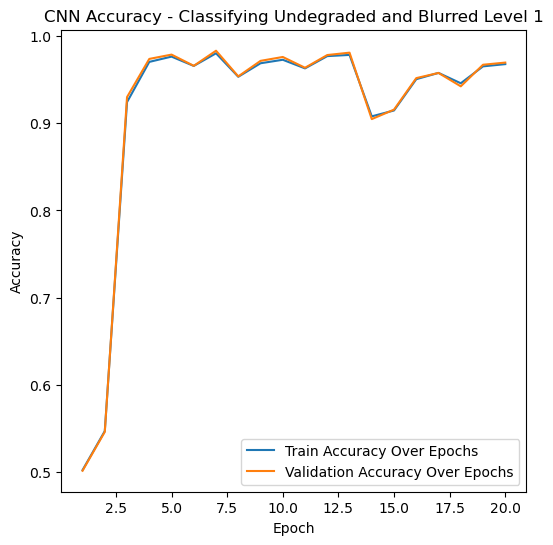

In [11]:
plot_accuracy_per_epoch(20, percentCorrectPerEpochTrain, percentCorrectPerEpochTest, 
                        "CNN Accuracy - Classifying Undegraded and Blurred Level 1")

In [16]:
print(f'Accuracy on test set blurr-1 {100*percentCorrectPerEpochTest[-1]:.4f}%')

Accuracy on test set blurr-1 96.94%


### Noise degradation detection test

Here we train the CNN to classifiy an image as degraded or undegraded using the noise level 1 images as the degraded set. This test is to see if the CNN can tell the difference between the lowest level of noise and an undegraded image.

In [12]:
normal_train, normal_test = get_data('set_resized')
noise_train, noise_test = get_data('noise', [1])

images_train = np.concatenate((normal_train, noise_train))
images_train_labels = gen_labels([(len(normal_train), 1), (len(noise_train), 1)])

images_test = np.concatenate((normal_test, noise_test))
images_test_labels = gen_labels([(len(normal_test), 1), (len(noise_test), 1)])

indicies = np.random.permutation(len(images_train))

convNet, percentCorrectPerEpochTrain, percentCorrectPerEpochTest = trainCNN(images_train[indicies], 
                                                                            images_train_labels[indicies], 
                                                                            images_test,
                                                                            images_test_labels, num_classes=2)

Epoch 1 loss: 0.0033965
Epoch 2 loss: 0.0011246
Epoch 3 loss: 0.0019326
Epoch 4 loss: 0.0011876
Epoch 5 loss: 0.0009988
Epoch 6 loss: 0.0008663
Epoch 7 loss: 0.0007623
Epoch 8 loss: 0.0006770
Epoch 9 loss: 0.0005820
Epoch 10 loss: 0.0000385
Epoch 11 loss: 0.0000210
Epoch 12 loss: 0.0000132
Epoch 13 loss: 0.0000179
Epoch 14 loss: 0.0000023
Epoch 15 loss: 0.0000024
Epoch 16 loss: 0.0000016
Epoch 17 loss: 0.0000013
Epoch 18 loss: 0.0000011
Epoch 19 loss: 0.0000014
Epoch 20 loss: 0.0000031
Finished Training


### Testing noise level 1 detection

Here we can clearly see that the above CNN is capable of dedecting the lowest level of noise.

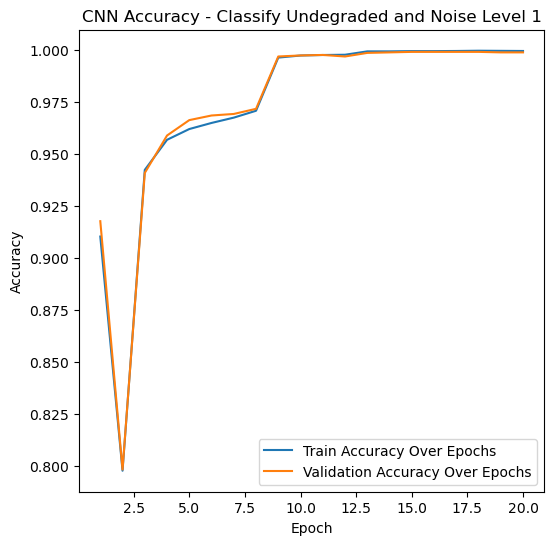

In [13]:
plot_accuracy_per_epoch(20, percentCorrectPerEpochTrain, percentCorrectPerEpochTest, 
                        "CNN Accuracy - Classify Undegraded and Noise Level 1")

In [15]:
print(f'Accuracy on test set noise-1 {100*percentCorrectPerEpochTest[-1]:.4f}%')

Accuracy on test set noise-1 99.9011%


### Compression degradation detection test

Here we train the CNN to classifiy an image as degraded or undegraded using the level 5 compressed images as the degraded set. This test is to see if the CNN can tell the difference between the highest of compression and an undegraded image.

In [20]:
normal_train, normal_test = get_data('set_resized')
compressed_train, compressed_test = get_data('compressed', [1])

images_train = np.concatenate((normal_train, compressed_train))
images_train_labels = gen_labels([(len(normal_train), 1), (len(compressed_train), 1)])

images_test = np.concatenate((normal_test, compressed_test))
images_test_labels = gen_labels([(len(normal_test), 1), (len(compressed_test), 1)])

indicies = np.random.permutation(len(images_train))


convNet, percentCorrectPerEpochTrain, percentCorrectPerEpochTest = trainCNN(images_train[indicies], 
                                                                            images_train_labels[indicies], 
                                                                            images_test,
                                                                            images_test_labels, num_classes=2)

Epoch 1 loss: 0.0036740
Epoch 2 loss: 0.0027020
Epoch 3 loss: 0.0026963
Epoch 4 loss: 0.0026905
Epoch 5 loss: 0.0026803
Epoch 6 loss: 0.0026713
Epoch 7 loss: 0.0026847
Epoch 8 loss: 0.0026543
Epoch 9 loss: 0.0026238
Epoch 10 loss: 0.0025590
Epoch 11 loss: 0.0024556
Epoch 12 loss: 0.0025169
Epoch 13 loss: 0.0024579
Epoch 14 loss: 0.0026319
Epoch 15 loss: 0.0025759
Epoch 16 loss: 0.0024552
Epoch 17 loss: 0.0026211
Epoch 18 loss: 0.0025344
Epoch 19 loss: 0.0024141
Epoch 20 loss: 0.0028985
Finished Training


### Testing compression detection

Here we can clearly see that the above CNN is not really capable of dedecting the even the most extream level of compression.

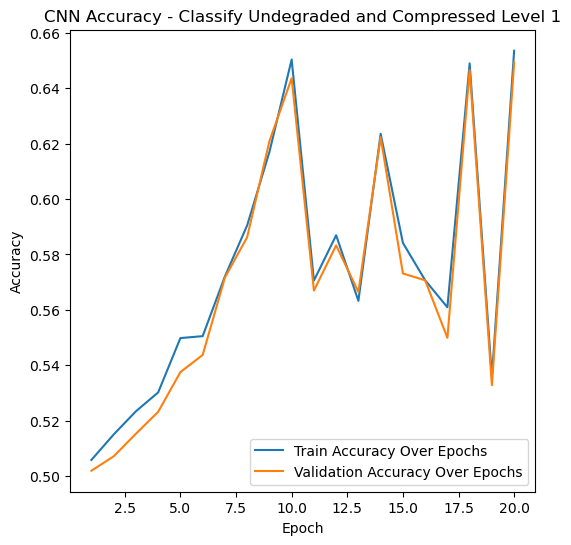

In [21]:
plot_accuracy_per_epoch(20, percentCorrectPerEpochTrain, percentCorrectPerEpochTest, 
                        "CNN Accuracy - Classify Undegraded and Compressed Level 1")

In [22]:
print(f'Accuracy on test set compressed-1 {100*percentCorrectPerEpochTest[-1]:.4f}%')

Accuracy on test set compressed-1 64.9283%


In [6]:
normal_train, normal_test = get_data('set_resized')
compressed_train, compressed_test = get_data('compressed', [3])

images_train = np.concatenate((normal_train, compressed_train))
images_train_labels = gen_labels([(len(normal_train), 1), (len(compressed_train), 1)])

images_test = np.concatenate((normal_test, compressed_test))
images_test_labels = gen_labels([(len(normal_test), 1), (len(compressed_test), 1)])

indicies = np.random.permutation(len(images_train))


convNet, percentCorrectPerEpochTrain, percentCorrectPerEpochTest = trainCNN(images_train[indicies], 
                                                                            images_train_labels[indicies], 
                                                                            images_test,
                                                                            images_test_labels, num_classes=2)

Epoch 1 loss: 0.0039297
Epoch 2 loss: 0.0027213
Epoch 3 loss: 0.0027134
Epoch 4 loss: 0.0027133
Epoch 5 loss: 0.0027106
Epoch 6 loss: 0.0027083
Epoch 7 loss: 0.0027074
Epoch 8 loss: 0.0027055
Epoch 9 loss: 0.0027058
Epoch 10 loss: 0.0027048
Epoch 11 loss: 0.0027037
Epoch 12 loss: 0.0027032
Epoch 13 loss: 0.0027026
Epoch 14 loss: 0.0027022
Epoch 15 loss: 0.0027020
Epoch 16 loss: 0.0027021
Epoch 17 loss: 0.0027019
Epoch 18 loss: 0.0027017
Epoch 19 loss: 0.0027016
Epoch 20 loss: 0.0027014
Finished Training


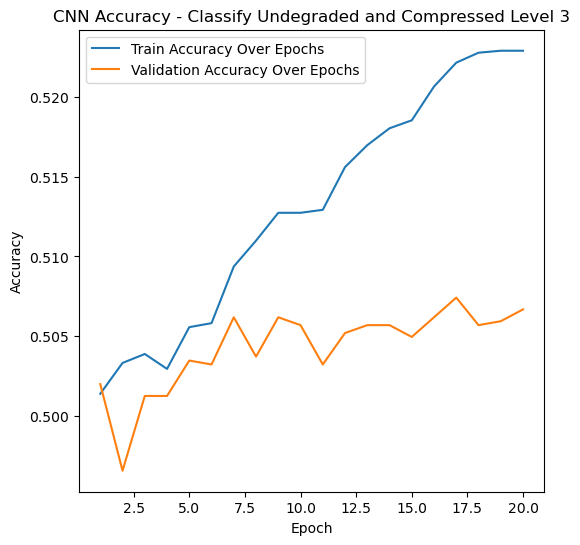

In [7]:
plot_accuracy_per_epoch(20, percentCorrectPerEpochTrain, percentCorrectPerEpochTest, 
                        "CNN Accuracy - Classify Undegraded and Compressed Level 3")

In [8]:
print(f'Accuracy on test set compressed-3 {100*percentCorrectPerEpochTest[-1]:.4f}%')

Accuracy on test set compressed-3 50.6673%


In [15]:
normal_train, normal_test = get_data('set_resized')
compressed_train, compressed_test = get_data('compressed', [5])

images_train = np.concatenate((normal_train, compressed_train))
images_train_labels = gen_labels([(len(normal_train), 1), (len(compressed_train), 1)])

images_test = np.concatenate((normal_test, compressed_test))
images_test_labels = gen_labels([(len(normal_test), 1), (len(compressed_test), 1)])

indicies = np.random.permutation(len(images_train))


convNet, percentCorrectPerEpochTrain, percentCorrectPerEpochTest = trainCNN(images_train[indicies], 
                                                                            images_train_labels[indicies], 
                                                                            images_test,
                                                                            images_test_labels, 
                                                                            num_classes=2)

Epoch 1 loss: 0.0210870
Epoch 2 loss: 0.0027194
Epoch 3 loss: 0.0027044
Epoch 4 loss: 0.0026522
Epoch 5 loss: 0.0023710
Epoch 6 loss: 0.0022942
Epoch 7 loss: 0.0027398
Epoch 8 loss: 0.0027025
Epoch 9 loss: 0.0025815
Epoch 10 loss: 0.0026972
Epoch 11 loss: 0.0026750
Epoch 12 loss: 0.0026483
Epoch 13 loss: 0.0026213
Epoch 14 loss: 0.0025921
Epoch 15 loss: 0.0025523
Epoch 16 loss: 0.0025001
Epoch 17 loss: 0.0024311
Epoch 18 loss: 0.0020120
Epoch 19 loss: 0.0020491
Epoch 20 loss: 0.0011878
Finished Training


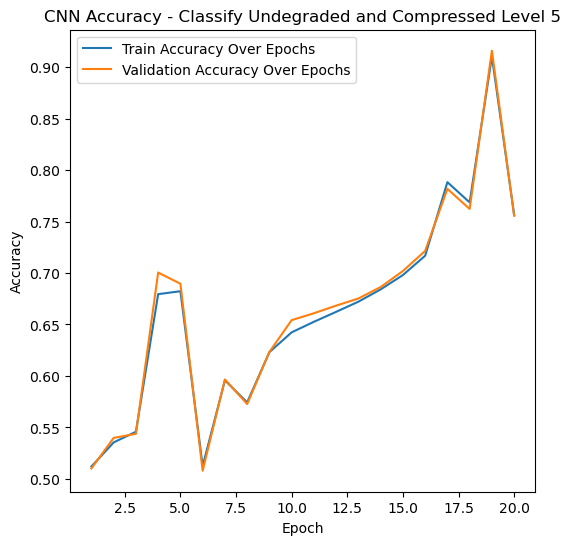

In [16]:
plot_accuracy_per_epoch(20, percentCorrectPerEpochTrain, percentCorrectPerEpochTest, 
                        "CNN Accuracy - Classify Undegraded and Compressed Level 5")

In [17]:
print(f'Accuracy on test set compressed-5 {100*percentCorrectPerEpochTest[-1]:.4f}%')

Accuracy on test set compressed-5 75.5561%


### Blurred level classification

Here we train a CNN to classify a blurred image as either lightly, moderately, or severely blurred.

In [13]:
blurred_train, blurred_test = get_data('blurred', [1,2,3,4,5], numImages=4000)

images_train_labels = gen_labels([(len(blurred_train), 5)])
images_test_labels = gen_labels([(len(blurred_test), 5)])

indicies = np.random.permutation(len(blurred_train))

convNet, percentCorrectPerEpochTrain, percentCorrectPerEpochTest = trainCNN(blurred_train[indicies], 
                                                                            images_train_labels[indicies], 
                                                                            blurred_test,
                                                                            images_test_labels, 
                                                                            num_classes=5)

Epoch 1 loss: 0.0121915
Epoch 2 loss: 0.0055419
Epoch 3 loss: 0.0060055
Epoch 4 loss: 0.0054604
Epoch 5 loss: 0.0052097
Epoch 6 loss: 0.0048230
Epoch 7 loss: 0.0046954
Epoch 8 loss: 0.0045790
Epoch 9 loss: 0.0044729
Epoch 10 loss: 0.0043757
Epoch 11 loss: 0.0042765
Epoch 12 loss: 0.0042186
Epoch 13 loss: 0.0042138
Epoch 14 loss: 0.0040810
Epoch 15 loss: 0.0071052
Epoch 16 loss: 0.0041751
Epoch 17 loss: 0.0040218
Epoch 18 loss: 0.0039112
Epoch 19 loss: 0.0040077
Epoch 20 loss: 0.0037630
Finished Training


### Blurred level classification test

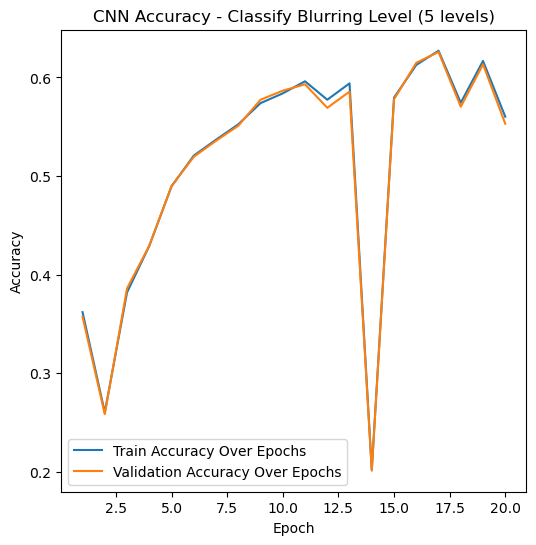

In [18]:
plot_accuracy_per_epoch(20, percentCorrectPerEpochTrain, percentCorrectPerEpochTest, 
                        "CNN Accuracy - Classify Blurring Level (5 levels)")

In [15]:
print(f'Accuracy on test set blurred-1/2/3/4/5 {100*percentCorrectPerEpochTest[-1]:.4f}%')

Accuracy on test set blurred-1/2/3/4/5 55.3139%


In [10]:
blurred_train, blurred_test = get_data('blurred', [1,3,5])

images_train_labels = gen_labels([(len(blurred_train), 3)])
images_test_labels = gen_labels([(len(blurred_test), 3)])

indicies = np.random.permutation(len(blurred_train))

convNet, percentCorrectPerEpochTrain, percentCorrectPerEpochTest = trainCNN(blurred_train[indicies], 
                                                                            images_train_labels[indicies], 
                                                                            blurred_test,
                                                                            images_test_labels, 
                                                                            num_classes=3)

Epoch 1 loss: 0.0076170
Epoch 2 loss: 0.0037703
Epoch 3 loss: 0.0034336
Epoch 4 loss: 0.0031713
Epoch 5 loss: 0.0029101
Epoch 6 loss: 0.0025088
Epoch 7 loss: 0.0023045
Epoch 8 loss: 0.0021483
Epoch 9 loss: 0.0021579
Epoch 10 loss: 0.0018808
Epoch 11 loss: 0.0029035
Epoch 12 loss: 0.0017386
Epoch 13 loss: 0.0014048
Epoch 14 loss: 0.0012145
Epoch 15 loss: 0.0024128
Epoch 16 loss: 0.0007934
Epoch 17 loss: 0.0004802
Epoch 18 loss: 0.0017174
Epoch 19 loss: 0.0024576
Epoch 20 loss: 0.0023804
Finished Training


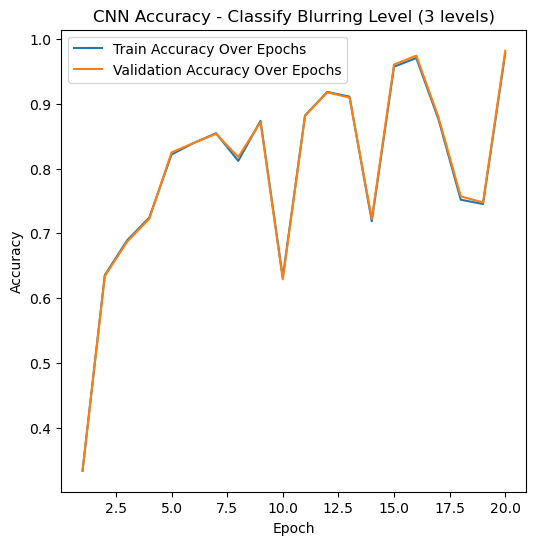

In [11]:
plot_accuracy_per_epoch(20, percentCorrectPerEpochTrain, percentCorrectPerEpochTest, 
                        "CNN Accuracy - Classify Blurring Level (3 levels)")

In [12]:
print(f'Accuracy on test set blurred-1/3/5 {100*percentCorrectPerEpochTest[-1]:.4f}%')

Accuracy on test set blurred-1/3/5 98.1875%


### Noise level classification

Here we train a CNN to classify the amount of noise in a noise degraded image as either light, moderate, or severe.

In [6]:
noise_train, noise_test = get_data('noise', [1,2,3,4,5], numImages=4000)

images_train_labels = gen_labels([(len(noise_train), 5)])
images_test_labels = gen_labels([(len(noise_test), 5)])

indicies = np.random.permutation(len(noise_train))

convNet, percentCorrectPerEpochTrain, percentCorrectPerEpochTest = trainCNN(noise_train[indicies], 
                                                                            images_train_labels[indicies], 
                                                                            noise_test,
                                                                            images_test_labels, 
                                                                            num_classes=5)

Epoch 1 loss: 0.0157997
Epoch 2 loss: 0.0056399
Epoch 3 loss: 0.0060957
Epoch 4 loss: 0.0057013
Epoch 5 loss: 0.0060995
Epoch 6 loss: 0.0056765
Epoch 7 loss: 0.0055262
Epoch 8 loss: 0.0058072
Epoch 9 loss: 0.0062957
Epoch 10 loss: 0.0062848
Epoch 11 loss: 0.0062786
Epoch 12 loss: 0.0062757
Epoch 13 loss: 0.0062748
Epoch 14 loss: 0.0062752
Epoch 15 loss: 0.0062761
Epoch 16 loss: 0.0062774
Epoch 17 loss: 0.0062787
Epoch 18 loss: 0.0062801
Epoch 19 loss: 0.0062813
Epoch 20 loss: 0.0062824
Finished Training


### Noise level classification test

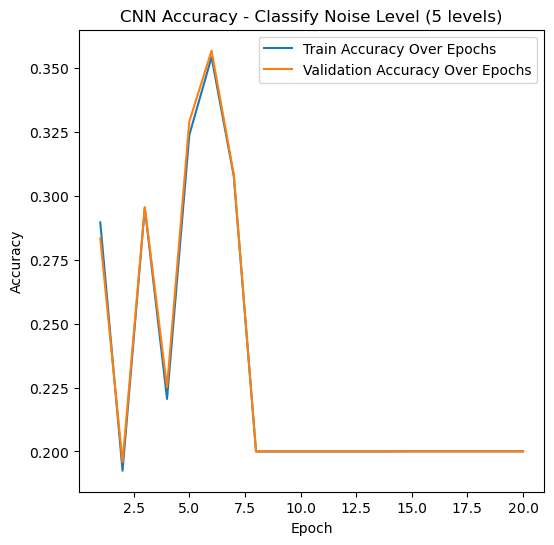

In [7]:
plot_accuracy_per_epoch(20, percentCorrectPerEpochTrain, percentCorrectPerEpochTest, 
                        "CNN Accuracy - Classify Noise Level (5 levels)")

In [8]:
print(f'Accuracy on test set noise-1/2/3/4/5 {100*percentCorrectPerEpochTest[-1]:.4f}%')

Accuracy on test set noise-1/2/3/4/5 20.0000%


In [9]:
noise_train, noise_test = get_data('noise', [1,3,5], numImages=4000)

images_train_labels = gen_labels([(len(noise_train), 3)])
images_test_labels = gen_labels([(len(noise_test), 3)])

indicies = np.random.permutation(len(noise_train))

convNet, percentCorrectPerEpochTrain, percentCorrectPerEpochTest = trainCNN(noise_train[indicies], 
                                                                            images_train_labels[indicies], 
                                                                            noise_test,
                                                                            images_test_labels, 
                                                                            num_classes=3)

Epoch 1 loss: 0.0048932
Epoch 2 loss: 0.0020181
Epoch 3 loss: 0.0019265
Epoch 4 loss: 0.0023195
Epoch 5 loss: 0.0014526
Epoch 6 loss: 0.0007533
Epoch 7 loss: 0.0041807
Epoch 8 loss: 0.0029521
Epoch 9 loss: 0.0027334
Epoch 10 loss: 0.0024376
Epoch 11 loss: 0.0017623
Epoch 12 loss: 0.0014169
Epoch 13 loss: 0.0012399
Epoch 14 loss: 0.0011175
Epoch 15 loss: 0.0010189
Epoch 16 loss: 0.0009424
Epoch 17 loss: 0.0007956
Epoch 18 loss: 0.0007091
Epoch 19 loss: 0.0006296
Epoch 20 loss: 0.0005626
Finished Training


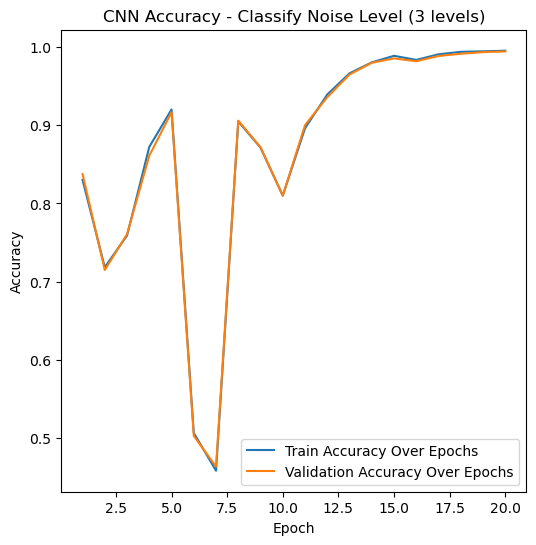

In [10]:
plot_accuracy_per_epoch(20, percentCorrectPerEpochTrain, percentCorrectPerEpochTest, 
                        "CNN Accuracy - Classify Noise Level (3 levels)")

In [12]:
print(f'Accuracy on test set noise-1/3/5 {100*percentCorrectPerEpochTest[-1]:.4f}%')

Accuracy on test set noise-1/3/5 99.4398%


### Degradation classification 

Here we train the CNN to classify the type of degradation as either undegraded, blurred, or noise. 

In [6]:
normal_train, normal_test = get_data('set_resized', numImages=4800)
blurred_train, blurred_test = get_data('blurred', [1,3,5], numImages=1600)
noise_train, noise_test = get_data('noise', [1,3,5], numImages=1600)
compressed_train, compressed_test = get_data('compressed', [5], numImages=4800)

images_train = np.concatenate((normal_train, blurred_train))
images_train = np.concatenate((images_train, noise_train))
images_train = np.concatenate((images_train, compressed_train))

images_train_labels = gen_labels([(len(normal_train), 1), (len(blurred_train), 1), 
                                  (len(noise_train), 1), (len(compressed_train), 1)])

images_test = np.concatenate((normal_test, blurred_test))
images_test = np.concatenate((images_test, noise_test))
images_test = np.concatenate((images_test, compressed_test))

images_test_labels = gen_labels([(len(normal_test), 1), (len(blurred_test), 1), 
                                 (len(noise_test), 1), (len(compressed_test), 1)])

indicies = np.random.permutation(len(images_train))

convNet, percentCorrectPerEpochTrain, percentCorrectPerEpochTest = trainCNN(images_train[indicies], 
                                                                            images_train_labels[indicies], 
                                                                            images_test,
                                                                            images_test_labels, 
                                                                            num_classes=4)

'''
if os.path.exists('data/degradation_classifier.pth') and False:
    degradation_classifier = ConvNet(num_classes=3)
    degradation_classifier.load_state_dict(torch.load('data/degradation_classifier.pth'))
else:
    degradation_classifier, percentCorrectPerEpochTrain = trainCNN(images_train[indicies], images_train_labels[indicies], 
                                                                   num_classes=3, epochs=20)
    torch.save(degradation_classifier.state_dict(), "data/degradation_classifier.pth")
'''

Epoch 1 loss: 0.0088423
Epoch 2 loss: 0.0037675
Epoch 3 loss: 0.0029334
Epoch 4 loss: 0.0031362
Epoch 5 loss: 0.0029254
Epoch 6 loss: 0.0028694
Epoch 7 loss: 0.0030700
Epoch 8 loss: 0.0038740
Epoch 9 loss: 0.0022340
Epoch 10 loss: 0.0016675
Epoch 11 loss: 0.0024636
Epoch 12 loss: 0.0014358
Epoch 13 loss: 0.0016696
Epoch 14 loss: 0.0010193
Epoch 15 loss: 0.0011531
Epoch 16 loss: 0.0006731
Epoch 17 loss: 0.0005567
Epoch 18 loss: 0.0010832
Epoch 19 loss: 0.0008419
Epoch 20 loss: 0.0004446
Finished Training


'\nif os.path.exists(\'data/degradation_classifier.pth\') and False:\n    degradation_classifier = ConvNet(num_classes=3)\n    degradation_classifier.load_state_dict(torch.load(\'data/degradation_classifier.pth\'))\nelse:\n    degradation_classifier, percentCorrectPerEpochTrain = trainCNN(images_train[indicies], images_train_labels[indicies], \n                                                                   num_classes=3, epochs=20)\n    torch.save(degradation_classifier.state_dict(), "data/degradation_classifier.pth")\n'

### Testing degradation type classification

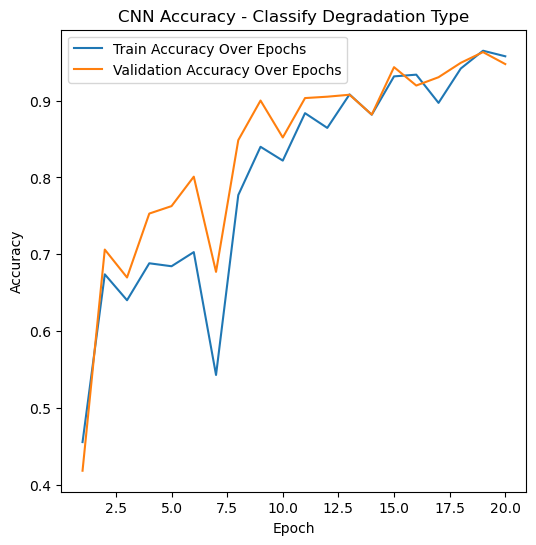

In [7]:
plot_accuracy_per_epoch(20, percentCorrectPerEpochTrain, percentCorrectPerEpochTest, 
                        "CNN Accuracy - Classify Degradation Type")

In [8]:
print(f'Accuracy on test set - classify degradation type {100*percentCorrectPerEpochTest[-1]:.4f}%')

Accuracy on test set - classify degradation type 94.7479%


### Creating Test Set With Undegraded, Blurred, and Noise 

Here we are creating a testing set consiting of the undegraded, blurred (light, moderate, and severe), and noise (light, moderate, and severe) images. 

In [6]:
normal_train, normal_test = get_data('set_resized', numImages=2500)
blurred_train, blurred_test = get_data('blurred', [1,3,5], numImages=2500)
noise_train, noise_test = get_data('noise', [1,3,5], numImages=2500)
compressed_train, compressed_test = get_data('compressed', [5], numImages=2500)

images_train = np.concatenate((normal_train, blurred_train))
images_train = np.concatenate((images_train, noise_train))
images_train = np.concatenate((images_train, compressed_train))

images_train_labels = gen_labels([(len(normal_train), 1), (len(blurred_train), 3), 
                                  (len(noise_train), 3), (len(compressed_train), 1)])

images_test = np.concatenate((normal_test, blurred_test))
images_test = np.concatenate((images_test, noise_test))
images_test = np.concatenate((images_test, compressed_test))

images_test_labels = gen_labels([(len(normal_test), 1), (len(blurred_test), 3), 
                                 (len(noise_test), 3), (len(compressed_test), 1)])

indicies = np.random.permutation(len(images_train))


if os.path.exists('data/degradation_classifier.pth'):
    degradation_classifier = ConvNet(num_classes=8)
    degradation_classifier.load_state_dict(torch.load('data/degradation_classifier.pth'))
else:
    degradation_classifier, percentCorrectPerEpochTrain, percentCorrectPerEpochTest = trainCNN(images_train[indicies], 
                                                                                               images_train_labels[indicies], 
                                                                                               images_test,
                                                                                               images_test_labels, 
                                                                                               num_classes=8)

Epoch 1 loss: 0.0195394
Epoch 2 loss: 0.0053773
Epoch 3 loss: 0.0032287
Epoch 4 loss: 0.0038722
Epoch 5 loss: 0.0072597
Epoch 6 loss: 0.0045459
Epoch 7 loss: 0.0027153
Epoch 8 loss: 0.0047180
Epoch 9 loss: 0.0016283
Epoch 10 loss: 0.0039375
Epoch 11 loss: 0.0026567
Epoch 12 loss: 0.0020998
Epoch 13 loss: 0.0014690
Epoch 14 loss: 0.0022196
Epoch 15 loss: 0.0016564
Epoch 16 loss: 0.0052382
Epoch 17 loss: 0.0013072
Epoch 18 loss: 0.0009699
Epoch 19 loss: 0.0033877
Epoch 20 loss: 0.0007516
Finished Training


In [9]:
torch.save(degradation_classifier.state_dict(), "data/degradation_classifier.pth")

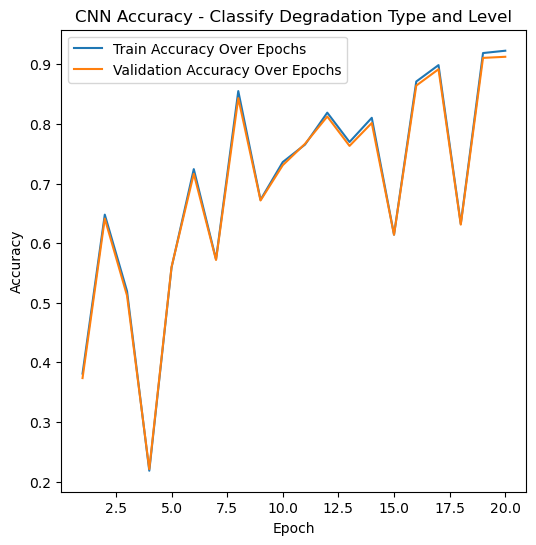

In [7]:
plot_accuracy_per_epoch(20, percentCorrectPerEpochTrain, percentCorrectPerEpochTest, 
                        "CNN Accuracy - Classify Degradation Type and Level")

In [8]:
print(f'Accuracy on test set - classify degradation type and level {100*percentCorrectPerEpochTest[-1]:.4f}%')

Accuracy on test set - classify degradation type and level 91.2630%


### Predicting Degradation Type and Severity Over the Entire Test Set

Here we combine our CNN that was trained to classify the type of degradation with the CNNs trained to classify the degree of degradation. The idea is to first classify the type of degradation (if there is any at all), and then determine the degree of degradation.

In [43]:
_, wrongly_classified, confusion_matrix = testCNN(degradation_classifier, 
                                                  np_to_torchLoader(images_test, images_test_labels, 1), 
                                                  num_classes=8)

### Plotting Confusion Matrix

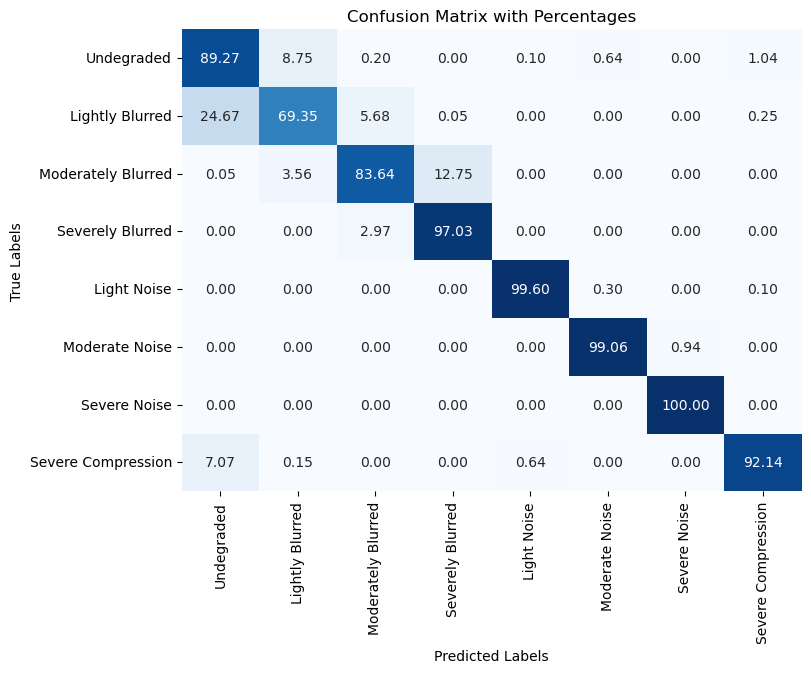

In [26]:
labels = ["Undegraded", "Lightly Blurred", "Moderately Blurred", "Severely Blurred", 
          "Light Noise", "Moderate Noise", "Severe Noise", "Severe Compression"]

mat = np.round(confusion_matrix * (100 / (len(blurred_test)/3)), 2)

plt.figure(figsize=(8, 6))
ax = sns.heatmap(mat, annot=True, fmt=".2f", cmap="Blues", cbar=False,
                 xticklabels=labels, yticklabels=labels)
ax.set_xlabel("Predicted Labels")
ax.set_ylabel("True Labels")
ax.set_title("Confusion Matrix with Percentages")

plt.show()

### Examining Wrongly Classified Images

In [53]:
label_map = {
    0 : 'Undegraded',
    1 : 'Lightly Blurred',
    2 : 'Moderately Blurred',
    3 : 'Severely Blurred',
    4 : 'Light Noise',
    5 : 'Moderate Noise',
    6 : 'Severe Noise',
    7 : 'Severe Compression'
}



def plot_tensors(tensors, title, y=0.9):
    fig, axes = plt.subplots(1, len(tensors), figsize=(12, 4))

    for i, (img, label) in enumerate(tensors):
        if isinstance(img, torch.Tensor):
            img = img.squeeze().numpy()
        axes[i].imshow(img, cmap='gray')  
        axes[i].axis('off')
        axes[i].set_title(f'True Label: {label_map[label]}', fontsize=10)

    plt.suptitle(title, ha='center', y=y)
    plt.show()

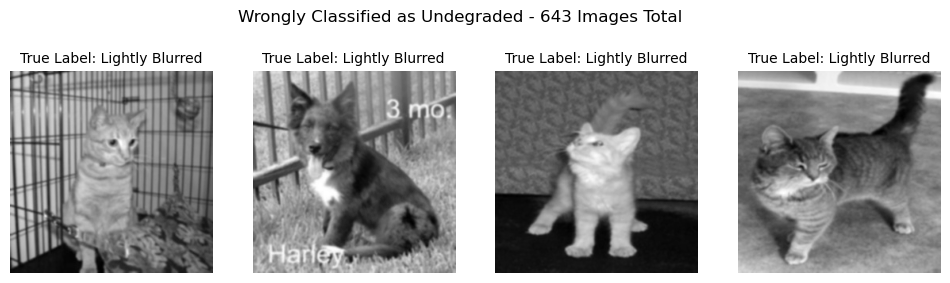

In [54]:
random_indices = random.sample(range(len(wrongly_classified[0])), 4)

plot_tensors([wrongly_classified[0][i] for i in random_indices], 
             f'Wrongly Classified as Undegraded - {len(wrongly_classified[0])} Images Total')

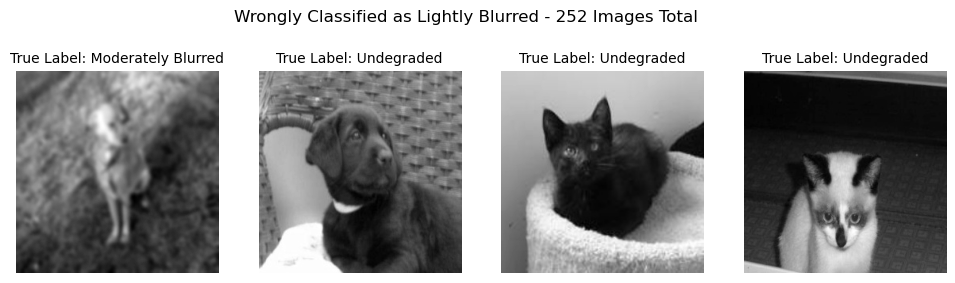

In [56]:
random_indices = random.sample(range(len(wrongly_classified[1])), 4)

plot_tensors([wrongly_classified[1][i] for i in random_indices], 
             f'Wrongly Classified as Lightly Blurred - {len(wrongly_classified[1])} Images Total')

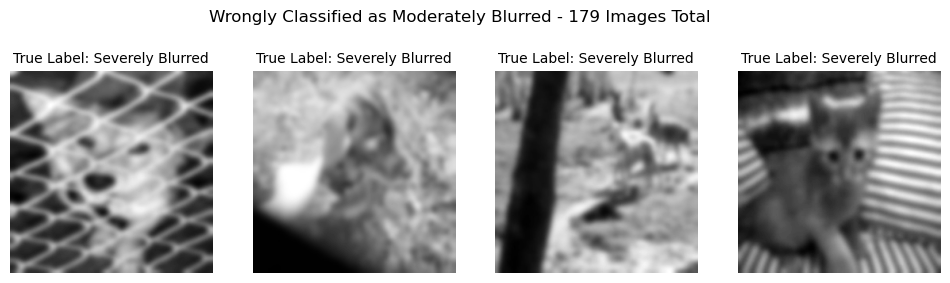

In [57]:
random_indices = random.sample(range(len(wrongly_classified[2])), 4)

plot_tensors([wrongly_classified[2][i] for i in random_indices], 
             f'Wrongly Classified as Moderately Blurred - {len(wrongly_classified[2])} Images Total')

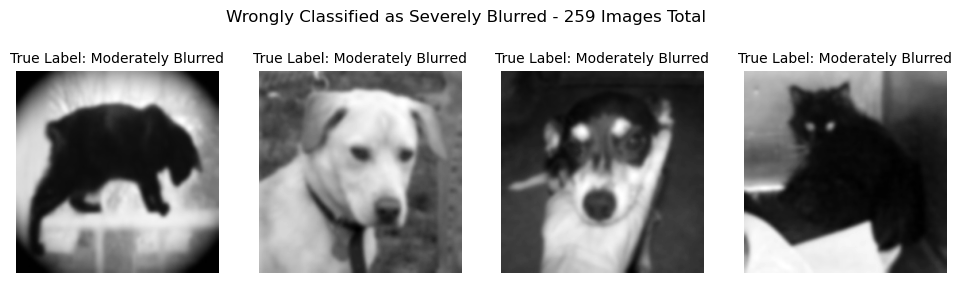

In [60]:
random_indices = random.sample(range(len(wrongly_classified[3])), 4)

plot_tensors([wrongly_classified[3][i] for i in random_indices], 
             f'Wrongly Classified as Severely Blurred - {len(wrongly_classified[3])} Images Total')

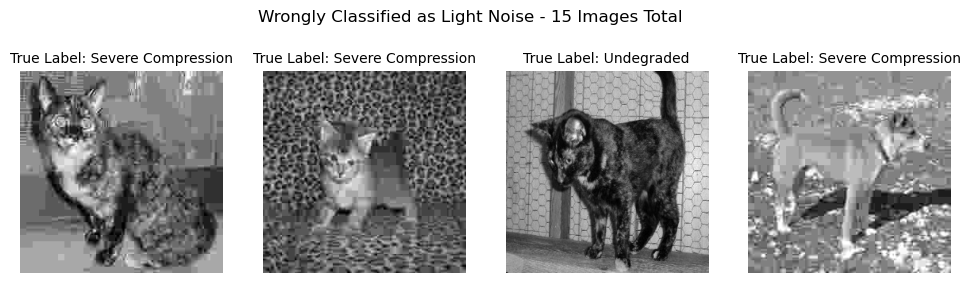

In [61]:
random_indices = random.sample(range(len(wrongly_classified[4])), 4)

plot_tensors([wrongly_classified[4][i] for i in random_indices], 
             f'Wrongly Classified as Light Noise - {len(wrongly_classified[4])} Images Total')

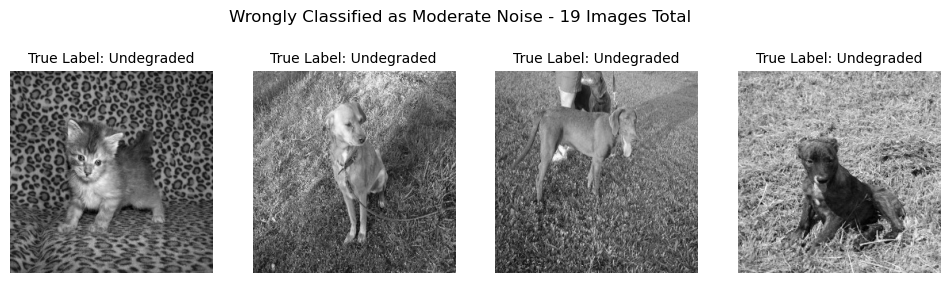

In [62]:
random_indices = random.sample(range(len(wrongly_classified[5])), 4)

plot_tensors([wrongly_classified[5][i] for i in random_indices], 
             f'Wrongly Classified as Moderate Noise - {len(wrongly_classified[5])} Images Total')

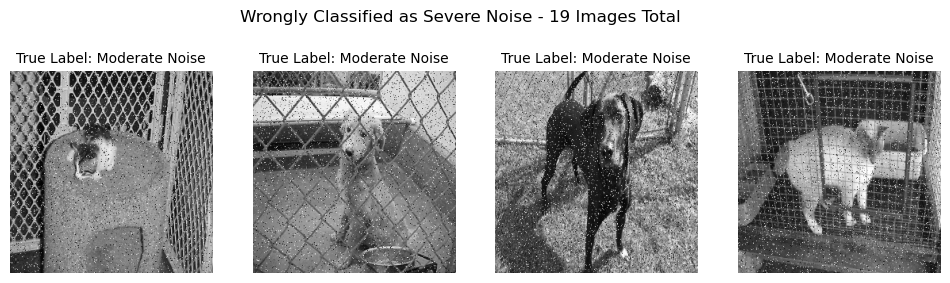

In [63]:
random_indices = random.sample(range(len(wrongly_classified[6])), 4)

plot_tensors([wrongly_classified[6][i] for i in random_indices], 
             f'Wrongly Classified as Severe Noise - {len(wrongly_classified[6])} Images Total')

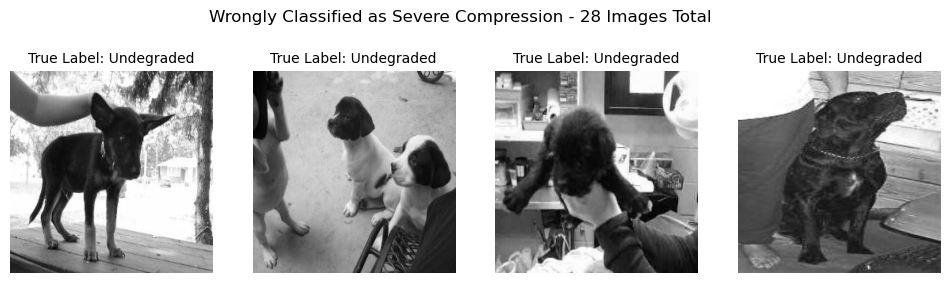

In [66]:
random_indices = random.sample(range(len(wrongly_classified[7])), 4)

plot_tensors([wrongly_classified[7][i] for i in random_indices], 
             f'Wrongly Classified as Severe Compression - {len(wrongly_classified[7])} Images Total')